<a id="top"></a>
# Interactive Examples of Data Handlers
<hr style="border-top: 3px double #8c8b8b;"/>
<ol>
<li> <h3><a href="#Ascii">General Ascii</a> </h3></li>
<li> <h3><a href="#group">Assorted Sparameter and Power Formats</a> </h3></li>
<li> <h3><a href="#correction">Error Correction </a> </h3></li>


</ol>
<hr style="border-top: 3px double #8c8b8b;"/>

In [1]:
# import libraries
from pyMeasure import *
import random
import os
import re
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed

Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments


 <a href="#top"> <em>back to top</em></a>
 <hr style="border-top: 2px double #8c8b8b;"/>
 <h3><a id="Ascii">General Ascii</a> </h3>

In [2]:
# Define a data table with a header, data and a footer
data=[[i+j*10 for i in range(5) ] for j in range(20)]
new_table=AsciiDataTable(None,data=data,header=["My header Line 1", "My Header Line 2"],footer=["footer"])


In [9]:
def shuffle_format(x):
    random.seed(x)
    comment_characters=["#","!","/*","**","//","^","%","%%","","@","$","&","?"]
    section_seperators=["","*"*80,"--Section--","-"*80,"\n","--$--"]
    data_delimiters=[",",".",":",";","-"," ","\t","::","~"," | ",","," ","+"]
    begin_end_pairs=[["<",">"],["(*","*)"],
                     ["[","]"],["/*","*/"],["(",")"],["<","/>"],["#",""],["{","}"],["",""],
                    ["(",")"],["\`","\'"]]
    random.shuffle(comment_characters)
    random.shuffle(data_delimiters)
    random.shuffle(begin_end_pairs)
    random.shuffle(section_seperators)
    new_table.options["data_table_element_separator"]="\n"+section_seperators[0]+"\n"
    new_table.options["column_names_begin_token"]=begin_end_pairs[0][0]
    new_table.options["column_names_end_token"]=begin_end_pairs[0][1]
    new_table.options["data_delimiter"]=data_delimiters[0]
    new_table.options["comment_begin"]=comment_characters[0]
    new_table.options["comment_end"]="\n"
    random.shuffle(data_delimiters)
    random.shuffle(begin_end_pairs)
    new_table.options["column_names_delimiter"]=data_delimiters[0]
    new_table.options["row_begin_token"]=begin_end_pairs[0][0]
    new_table.options["row_end_token"]=begin_end_pairs[0][1]+"\n"
    print new_table
interact(shuffle_format,x=(0,1000,1))
    

**My header Line 1
**My Header Line 2

--$--
(*x0 x1 x2 x3 x4*)
--$--
{0 1 2 3 4}
{10 11 12 13 14}
{20 21 22 23 24}
{30 31 32 33 34}
{40 41 42 43 44}
{50 51 52 53 54}
{60 61 62 63 64}
{70 71 72 73 74}
{80 81 82 83 84}
{90 91 92 93 94}
{100 101 102 103 104}
{110 111 112 113 114}
{120 121 122 123 124}
{130 131 132 133 134}
{140 141 142 143 144}
{150 151 152 153 154}
{160 161 162 163 164}
{170 171 172 173 174}
{180 181 182 183 184}
{190 191 192 193 194}
--$--
**footer



 <a href="#top"> <em>back to top</em></a>
 <hr style="border-top: 2px double #8c8b8b;"/>
 <h3><a id="group">Assorted Sparameter and Power Formats</a> </h3>

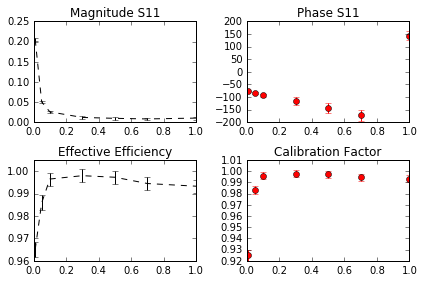

In [4]:
%matplotlib inline
os.chdir(TESTS_DIRECTORY)
file_names=["700083.asc","700196.asc","CTN208.A1_011613","CTN106.D4_091799","952489.asc",
            "N205RV.asc","ftest6_L1_g5_HF_air","QuartzRefExample_L1_g10_HF",
            "filtern5_narrow.s2p","thru.s2p","setup20101028.s4p",
            "B7_baseline_50ohm_OR2_10n0_4p0_REV2_EVB1_01new.s3p",
            "One_Port_Raw_Sparameter_20160307_001.xml",
            "Resource_Registry_20160518_001_Metadata.xml",
            "open.meas","Example_HD5.mat"]
file_paths=map(lambda x:os.path.join(TESTS_DIRECTORY,x),file_names)
def model_selector(file_path):
    "Selects the appropriate pyMeasure model given a file_path or file_name"
    extension=file_path.split(".")[-1]
    print("file path is {0} and extension is {1}".format(file_path,extension))
    if re.search("asc",extension,re.IGNORECASE):
        out=sparameter_power_type(file_path)
            
    elif file_path==extension:
        out='JBSparameter'
        
    elif re.search("(.)+_(.)+",extension):
        out=sparameter_power_type(file_path)

        
    elif re.search(EXTENSION_PATTERN,extension,re.IGNORECASE):
        match=re.match(EXTENSION_PATTERN,extension,re.IGNORECASE)
        n_ports=match.groupdict()["Number_Ports"]
        print n_ports
        if n_ports=='1':
            out='S1PV1'
        elif n_ports=='2':
            out='S2PV1'
        else:
            out='SNP'
    elif re.search("xml|meas",extension,re.IGNORECASE):
        out='XMLBase'
    elif re.search("mat",extension,re.IGNORECASE):
        out='RadicalDataModel'
    else:
        print("Could not find model for {0}".format(file_path))
        out='JBSparameter'
        
    #print("Model is {0}".format(out))
    return out
models=map(model_selector,file_paths)
pyMeasure_model_data={}
for index,model in enumerate(models):
    #print index
    pyMeasure_model_data[file_names[index]]=globals()[model](file_paths[index])
    
interact(lambda file_name: pyMeasure_model_data[file_name].show(),file_name=file_names)    

 <a href="#top"> <em>back to top</em></a>
 <hr style="border-top: 2px double #8c8b8b;"/>
 <h3><a id="correction">Error Correction</a> </h3>